# HSE 2021: Mathematical Methods for Data Analysis

## Homework 4

**Warning 1**: You have 2 weeks for this assignemnt.  **it is better to start early (!)**

**Warning 2**: it is critical to describe and explain what you are doing and why, use markdown cells


### Contents

#### Decision Trees - 7 points
* [Task 1](#task1) (0.5 points)
* [Task 2](#task2) (0.5 points)
* [Task 3](#task3) (2 points)
* [Task 4](#task4) (0.5 points)
* [Task 5](#task5) (0.5 points)
* [Task 6](#task6) (2 points)
* [Task 7](#task7) (0.5 points)
* [Task 8](#task8) (0.5 points)

#### Ensembles - 3 points
* [Task 1](#task2_1) (1 point)
* [Task 2](#task2_2) (0.7 points)
* [Task 3](#task2_3) (0.5 points)
* [Task 4](#task2_4) (0.7 points)
* [Task 5](#task2_5) (0.1 points)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (11, 5)
%matplotlib inline

#Sorry, I don't want to see warning in boston_dataset loading
import warnings
warnings.filterwarnings('ignore')

# Part 1. Decision Tree Regressor

In this task you will be implementing decision tree for the regression by hand. 

### Task 1 <a id="task1"></a> (0.5 points)

Here you should implement the function `H()` which calculates impurity criterion. We will be training regression tree, and will take mean absolute deviation as impurity criterion.

* You cannot use loops
* If `y` is empty, the function should return 0

In [ ]:
def H(y):
    """
    Calculate impurity criterion
    
    Parameters
    ----------
    y : np.array
        array of objects target values in the node

    Returns
    -------
    H(R) : float
        Impurity in the node (measuread by variance)
    """

    if not np.any(y):
      return 0.0

    #Формула выборочной дисперсии.
    return np.mean(np.power(y - np.mean(y), 2))

In [ ]:
# Test the function
assert np.allclose(H(np.array([4, 2, 2, 2])), 0.75)
assert np.allclose(H(np.array([])), 0.0)

### Task 2 <a id="task2"></a>  (0.5 points)

To find the best split in the node we need to calculate the cost function. Denote: 
- `R` all the object in the node
- `j` index of the feature selected for the split
- `t` threshold
- `R_l` and `R_r` objects in the left and right child nodes correspondingly

We get the following cost function:

$$
Q(R, j, t) =\frac{|R_\ell|}{|R|}H(R_\ell) + \frac{|R_r|}{|R|}H(R_r) \to \min_{j, t},
$$

Implement the function `Q`, which should calculate value of the cost function for a given feature and threshold.

In [ ]:
def Q(X, y, j, t):
    """
    Calculate cost function
    Parameters
    ----------
    X : ndarray
        array of objects in the node 
    y : ndarray
        array of target values in the node 
    j : int
        feature index (column in X)
    t : float
        threshold

    Returns
    -------
    Q : float
        Value of the cost function
    """
    X_length = len(X)
    column_values = X[:,j]
    R_left = y[column_values < t]
    R_right = y[column_values >= t]
    return len(R_left)/X_length*H(R_left) + len(R_right)/X_length*H(R_right)

### Task 3 <a id="task3"></a>  (2 points)

Now, let's implement `MyDecisionTreeRegressor` class. More specifically, you need to implement the following methods:

- `best_split`
- `grow_tree`
- `get_prediction`

Also, please add `min_samples_leaf` parameter to your class

Read docstrings for more details. Do not forget to use function `Q` implemented above, when finding the `best_split`

In [ ]:
class Node(object):
    """
    Class for a decision tree node.
    
    Parameters
    ----------
    right : Node() or None
        Right child
    right : Node() or None
        Left child
    threshold: float
        
    column: int
        
    depth: int
        
    prediction: float
        prediction of the target value in the node 
        (average values calculated on a train dataset)
    is_terminal:bool
        indicates whether it is a terminal node (leaf) or not
    """    
    def __init__(self):        
        self.right = None
        self.left = None
        self.threshold = None
        self.column = None
        self.depth = None
        self.is_terminal = False
        self.prediction = None
        
    def __repr__(self):
        if self.is_terminal:
            node_desc = 'Pred: {:.2f}'.format(self.prediction)
        else:
            node_desc = 'Col {}, t {:.2f}, Pred: {:.2f}'. \
            format(self.column, self.threshold, self.prediction)
        return node_desc

In [29]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class MyDecisionTreeRegressor(RegressorMixin, BaseEstimator):
    """
    Class for a Decision Tree Regressor.

    Parameters
    ----------
    max_depth : int
        Max depth of a decision tree.
    min_samples_split : int
        Minimal number of samples (objects) in a node to make a split.
    """ 
    def __init__(self, max_depth=3, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
            
    def best_split(self, X, y):
        """
        Find the best split in terms of Q of data in a given decision tree node. 
        Try all features and thresholds. 
        
        Parameters
        ----------
        X : ndarray, shape (n_objects, n_features)
            Objects in the parent node
        y : ndarray, shape (n_objects, )
            1D array with the object labels. 
            
        Returns
        -------
        best_split_column : int
            Index of the best split column
        best_threshold : float
            The best split condition.
        X_left : ndarray, shape (n_objects_l, n_features)
            Objects in the left child
        y_left : ndarray, shape (n_objects_l, )
            Objects labels in the left child. 
        X_right : ndarray, shape (n_objects_r, n_features)
            Objects in the right child
        y_right : ndarray, shape (n_objects_r, )
            Objects labels in the right child. 
        """
        
        # To store best split parameters
        best_split_column = None
        best_threshold = None
        # without splitting
        best_cost = H(y) 
        is_not_divided = True

        # MY CODE HERE
        for temp_column_for_split in range(X.shape[1]):
            x_col = X[:, temp_column_for_split]
            for temp_threshold_index in range(0, len(x_col)):
                threshold = x_col[temp_threshold_index]
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                # Empty parts are not allowed.            
                if len(y_right) == 0 or len(y_left) == 0:
                    continue
                # min_samples_leaf limitation
                if len(y_right) < self.min_samples_leaf or len(y_left) < self.min_samples_leaf:
                    continue
                temp_cost = Q(X, y, temp_column_for_split, threshold)
                if temp_cost < best_cost:
                    is_not_divided = False
                    best_split_column = temp_column_for_split
                    best_threshold = threshold
                    best_cost = temp_cost

        if is_not_divided:
            return None, None, None, None, None, None

        x_column = X[:, best_split_column]
        X_left = X[x_column < best_threshold, :]
        y_left = y[x_column < best_threshold]
        X_right = X[x_column >= best_threshold, :]
        y_right = y[x_column >= best_threshold]
        return best_split_column, best_threshold, X_left, y_left, X_right, y_right
    
    def is_terminal(self, node, y):
        """
        Check terminality conditions based on `max_depth`, 
        `min_samples_split` parameters for a given node. 
        
        Parameters
        ----------
        node : Node, 
            
        y : ndarray, shape (n_objects, )
            Object labels. 
            
        Returns
        -------
        Is_termial : bool
            If True, node is terminal
        """
        if node.depth >= self.max_depth:    
            return True
        if len(y) < self.min_samples_split:   
            return True
        return False
        
    def grow_tree(self, node, X, y):
        """
        Reccurently grow the tree from the `node` using a `X` and `y` as a dataset:
         - check terminality conditions
         - find best split if node is not terminal
         - add child nodes to the node
         - call the function recursively for the added child nodes
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        X : ndarray, shape (n_objects, n_features)
            Objects 
        y : ndarray, shape (n_objects)
            Labels
        """
        #From seminar's example.
        if self.is_terminal(node, y):
            node.is_terminal = True
            return
                
        if len(np.unique(y)) == 1:
            node.is_terminal = True
            return
        
            
        best_split_column, best_threshold, X_left, y_left, X_right, y_right = self.best_split(X,y)

        node.threshold = best_threshold
        node.column = best_split_column
        
        if best_threshold is None:
            node.is_terminal = True
            return

        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.prediction = np.mean(y_left)
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.prediction = np.mean(y_right)

        self.grow_tree(node.left, X_left, y_left)
        self.grow_tree(node.right, X_right, y_right)

    def fit(self, X, y):
        """
        Fit the Decision Tree Regressor.
            
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input samples.
        y : ndarray, shape (n_samples,) or (n_samples, n_outputs)
            The target values.
        Returns
        -------
        self : object
            Returns self.
        """
        X, y = check_X_y(X, y, accept_sparse=False)
        self.is_fitted_ = True
        
        # Initialize the tree (root node)
        self.tree_ = Node()                             
        self.tree_.depth = 1                            
        self.tree_.prediction = np.mean(y)
        
        # Grow the tree
        self.grow_tree(self.tree_, X, y)
        return self        
    
    def get_prediction(self, node, x):
        """
        Get prediction for an object `x`
            - Return prediction of the `node` if it is terminal
            - Otherwise, recursively call the function to get 
            predictions of the proper child
        
        Parameters
        ----------
        node : Node() object
            Current node of the decision tree.
        x : ndarray, shape (n_features,)
            Array of feature values of one object.
        Returns
        -------
        y_pred : float
            Prediction for an object x
        """
        if node.is_terminal:
            return node.prediction

        y_pred = self.get_prediction((node.left if x[node.column] < node.threshold else node.right), x)
        return y_pred
    
    def predict(self, X):
        """ 
        Get prediction for each object in X
        
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            The input samples.
        Returns
        -------
        y : ndarray, shape (n_samples,)
            Returns predictions.
        """
        # Check input and that `fit` had been called
        X = check_array(X, accept_sparse=False)
        check_is_fitted(self, 'is_fitted_')
        
        # Get predictions
        y_predicted = []
        for x in X:
            y_curr = self.get_prediction(self.tree_, x)
            y_predicted.append(y_curr)
        return np.array(y_predicted)

In [30]:
# check yourself
from sklearn.utils.estimator_checks import check_estimator

check_estimator(MyDecisionTreeRegressor())

### Task 4 <a id="task4"></a>  (0.5 points)

Load boston dataset and split it on the train ($75\%$) and test ($25\%$). Fit Decision Tree of depth 1 and make the following plot:

- Scatter plot of the traning points (selected for split feature on the x-axis, target variable on the y-axis)
- Fitted model 

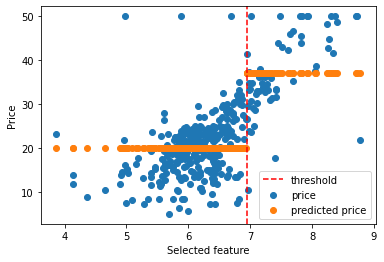

In [33]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import tree

data = load_boston()

X = data.data
Y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.75, test_size=0.25, random_state=42)

custom_tree = MyDecisionTreeRegressor(2)
custom_tree.fit(X_train, y_train)

x_train_from_column = X_train[:,custom_tree.tree_.column]
y_train_predicted = custom_tree.predict(X_train)
plt.scatter(x_train_from_column, y_train, label="price")
plt.scatter(x_train_from_column, y_train_predicted, label="predicted price")
plt.axvline(x=custom_tree.tree_.threshold, color='red', linestyle='--', label="threshold")
plt.xlabel("Selected feature")
plt.ylabel("Price")
plt.legend()
plt.show()

# I tried to plot a decision tree, but Node and MyDecisionTreeRegressor
# doesn't have some necessary parameters for method plot_tree:(

### Task 5 <a id="task5"></a>  (0.5 points)

Keep working with boston dataset. 
- Use `GridSearchCV` to find the best hyperparameters among [`max_depth`, `min_samples_leaf`] on 5-Fold cross-validation
- Train the model with the best set of hyperparameters on the whole train dataset. 
- Report `MAE` on test dataset and hyperparameters of the best estimator. 

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = { 
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 50],
}

rf_cv = GridSearchCV(estimator=MyDecisionTreeRegressor(), param_grid=grid, cv=5)
rf_cv.fit(X_train, y_train)
rf_cv.best_params_

{'max_depth': 4, 'min_samples_leaf': 5}

In [36]:
from sklearn.metrics import mean_absolute_error

best_model_to_test = MyDecisionTreeRegressor(max_depth=4, min_samples_leaf=5)
best_model_to_test.fit(X_train, y_train)
y_test_predicted = best_model_to_test.predict(X_test)
print(mean_absolute_error(y_test, y_test_predicted))

3.1044186917190086


В сравнении с значениями таргета ошибка на тесте не такая большая, это радует.

### Task 6 <a id="task6"></a>  (2 points)

Recall definition of bias and variance:
$$
\text{Bias}^2 = \mathbb{E}_{p(x, y)} \left[  (f(x) - \mathbb{E}_{\mathbb{X}}a_{\mathbb{X}}(x))^2 \right] \\
\text{Variance} = \mathbb{E}_{p(x, y)} \left[  \mathbb{V}_{\mathbb{X}}( a_{\mathbb{X}}(x))  \right]
$$

We wil now use use the following algorithm to estimate bias and variance:

1. Use bootsrap to create `n_iter` samples from the original dataset: $X_1, \dots, X_{n_iter}$
2. For each bootstrapped sample define out-of-bag (OOB) sample $Z_1, \dots, Z_{n_iter}$, which contain all the observations, which did not appear in the corresponding boostraped sample
3. Fit the model on $X_i$s and compute predictions on $Z_i$s
4. For a given *object* $n$:
     - bias^2: squared difference between true value $y_n$ and average prediction (average over the algorithms, for which $n$ was in OOB)
     - variance: variance of the prediction (predictions of the algorithms, for which $n$ was in OOB)
5. Average bias^2 and variance over all the points
    
**Implement `get_bias_variance` function, using the algorithm above**

*Note:*  You can only use 1 loop (for bootsrap iterations). All other operations should be vectorized. 

In [ ]:
def get_bias_variance(estimator, x, y, n_iter):
  """ 
    Calculate bias and variance of the `estimator`. 
    Using a given dataset and bootstrap with `n_iter` samples. 

    Parameters
    ----------
    x : ndarray, shape (n_samples, n_features)
        The input samples.
    y : ndarray, shape (n_samples, n_features)
        The input samples.
    n_iter: int
        Number of samples in 
    Returns
    -------
    bias2 : float, 
        Estiamted squared bias
    variance : float, 
        Estiamted variance
    """
  original_length = len(y)
  indexes_set = range(original_length)
  test_predictions = np.full((original_length, n_iter),np.nan)
  for iteration in range(n_iter):
    train_subsampling_indexes = np.random.choice(indexes_set, original_length)
    test_out_of_bag = np.setdiff1d(indexes_set, train_subsampling_indexes)
    estimator.fit(x[train_subsampling_indexes,:],y[train_subsampling_indexes])
    predicted_values = estimator.predict(x[test_out_of_bag, :])
    np.put(test_predictions[:, iteration], test_out_of_bag, predicted_values)
  average_var = np.nanmean(np.nanvar(test_predictions, axis = 1))
  average_bias_squared = np.nanmean(np.square(y - np.nanmean(test_predictions, axis = 1)))
  return average_bias_squared, average_var

Эта реализация немного отходит от описанной в задании, я не считаю смещение и дисперсию для каждого объекта, а беру её уже по итоговым данным. Я пробовал считать на каждой итерации, но получал оба компонента в районе сотни, что невозможно по определению, цены в целом лежат в пределе от 0 до 60, такие результаты не могут быть ответом.

In [35]:
# Test
estimator = MyDecisionTreeRegressor(max_depth=8, min_samples_split=15)
get_bias_variance(estimator, X_train, y_train, 10)

(18.135675756140493, 8.108684615380993)

### Task 7 <a id="task7"></a>  (0.5 points)

Compute bias and variance for the trees with different min_samples_split. Plot how bias and variance change as min_samples_split increases. 

Comment on what you observe, how does your result correspond to theory?

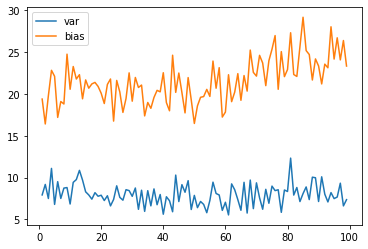

In [ ]:
min_samples = np.arange(1,100)
biases = []
vars = []
for i in min_samples:
  estimator = MyDecisionTreeRegressor(max_depth=5,min_samples_split=i)
  bias, var = get_bias_variance(estimator, X_train, y_train, 10)
  biases.append(bias)
  vars.append(var)

plt.plot(min_samples, vars, label="var")
plt.plot(min_samples, biases, label="bias")
plt.legend()
plt.show()

Итак, опишем ожидаемое поведение нашей модели с разным параметром min_samples_split на разных подвыборках. Увеличивая параметр min_samples_split мы не даём дереву переобучаться, соответственно смещение увеличивается, а дисперсия уменьшается, что мы и наблюдаем на графике. Уменьшение дисперсии не так заметно, график колеблется, так как, очевидно, есть элемент случайности, но она падает.

### Task 8 <a id="task8"></a>  (0.5 points)

Let's try to reduce variance with bagging. Use `sklearn.ensemble.BaggingRegressor` to get an ensemble and compute its bias and variance. 

Answer the following questions:
 - How bagging should affect bias and variance in theory?
 - How bias and variance change (if they change) compared to an individual tree in you experiments? 
 - Do your results align with the theory? Why?

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor(base_estimator=MyDecisionTreeRegressor(max_depth=8, min_samples_split=15), n_estimators=10, random_state=42)
get_bias_variance(bagging, X_train, y_train, n_iter=10)

(14.686940505210519, 2.4299688843320446)

* В теории, при использовании bagging мы опять же преследуем цель не переобучиться, поэтому дисперсия будет не самой большой, а смещение ненулевым. Понятно, что в крайности параметров переобучиться можно. Проблему высокой дисперсии используемых моделей bagging решает, а вот с bias лучше, чтобы оригинальная модель также не давала большого смещения(дерево и не даёт).
* Видим, что смещение есть, меньше не на много, а дисперсия сильно уменьшилась - избежали переобучения, в целом оба компонента здесь получились лучше, мы всегда стремися к золотой середине, когда смещение и дисперсия малы.
* На мой взгляд, всё получилось в соотвествии с теоретическими правилами, ансамбль смог обуздать проблемы используемых моделей, помог не уйти в переобучение, всё очень даже неплохо.

# Part 2. More Ensembles

In this part we will be working with [Thyroid Disease Data Set](https://archive.ics.uci.edu/ml/datasets/thyroid+disease) to solve a classification task. 

In [37]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('thyroid_disease.csv')

le = LabelEncoder()
y = le.fit_transform(df['Class'])
X = df.drop('Class', axis=1)
X.head(5)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source
0,41.0,F,f,f,f,f,f,f,f,f,...,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC
1,23.0,F,f,f,f,f,f,f,f,f,...,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other
2,46.0,M,f,f,f,f,f,f,f,f,...,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other
3,70.0,F,t,f,f,f,f,f,f,f,...,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other
4,70.0,F,f,f,f,f,f,f,f,f,...,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI


### Task 1 <a id="task2_1"></a> (1 point)

Let's start with data preprocessing. 

0. Drop columns, which are not usefull (e.g. a lot of missing values). Motivate your choice. 
1. Split dataset into train and test
2. You've probably noticed that we have both categorical and numerical columns. Here is what you need to do with them:
    - Categorical: Fill missing values and apply one-hot-encoding
    - Numeric: Fill missing values
    
Use `ColumnTranformer` to define a single transformer for all the columns in the dataset. It takes as input a list of tuples

```
ColumnTransformer([
    ('name1', transform1, column_names1),
    ('name2', transform2, column_names2)
])
```

Pay attention to an argument `remainder='passthrough'`. [Here](https://scikit-learn.org/stable/modules/compose.html#column-transformer) you can find some examples of how to use column transformer. 
    
Since we want to apply 2 transformations to categorical feature, it is very convenient to combine them into a `Pipeline`:

```
double_tranform = make_pipeline(
                        transform_1,
                        transform_2
                        )
```

P.S. Choose your favourite way to fill missing values. 

*Hint* Categorical column usually have `dtype = 'object'`. This may help to obtain list of categorical and numerical columns on the dataset. 

In [38]:
print("Общая информация о столбцах: число не пустых ячеек, тип:\n", df.info()) 
print()
print("Отношение пустых строк к общему числу:\n", df.isna().mean()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

Итак, заметим, что более половины признаков категориальные, имеется 6 неполных столбцов, то есть существуют пропущенные значения. Почти все пропущенные значения (не суммарно, а по признаку) не составляют более 20% от общего числа измерений признака, их можно дополнить, а вот столбец TBG очень сильно выбивается, он пуст, поэтому придётся его удалить.

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

y = le.fit_transform(df['Class'])
X = df.drop('Class', axis=1)
X.head(5)

X = X.drop(['TBG'], axis=1)
pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, train_size=0.6, random_state = 42)
column_transformer = ColumnTransformer(transformers=[('num', SimpleImputer(strategy='most_frequent'), make_column_selector(dtype_include = 'float')),('cat',pipeline,make_column_selector(dtype_include='object'))], remainder='passthrough')

X_train = column_transformer.fit_transform(X_train)
X_test = column_transformer.transform(X_test)

### Task 2 <a id="task2_2"></a> (0.7 points)

Fit and compare 5 different models (use sklearn): Gradient Boosting, Random Forest, Decision Tree, SVM, Logitics Regression
    
* Choose one classification metric and justify your choice .
* Compare the models using score on cross validation. Mind the class balance when choosing the cross validation. (You can read more about different CV strategies [here](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold))
* Which model has the best performance? Which models overfit or underfit?

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

# При поиске болезни нам важно пропустить как можно меньше заболевших, поэтому
# смотрим на Recall, мы хотим не допускать false negative ситуаций,
# модель с высоким recall это делает. 
from sklearn.metrics import recall_score

# Для кросс-валидации была выбрана стратегия StratifiedKFold,
# потому что она учитывает соотношение числа элементов класса в выборке.
# KFold этого не учитывает.

cross_val = StratifiedKFold(n_splits= 5)

gradient_boosting = GradientBoostingClassifier()
print("GradientBoosting recall: ", cross_validate(gradient_boosting, X_train, y_train, cv=cross_val, scoring='recall'))
random_forest = RandomForestClassifier()
print("RandomForest recall: ", cross_validate(random_forest, X_train, y_train, cv=cross_val, scoring='recall'))
decision_tree = DecisionTreeClassifier()
print("DecisionTree recall: ", cross_validate(decision_tree, X_train, y_train, cv=cross_val, scoring='recall'))
support_vector_vachine = SVC()
print("Support vector vachine recall: ", cross_validate(support_vector_vachine, X_train, y_train, cv=cross_val, scoring='recall'))
logistic_regression = LogisticRegression()
print("LogisticRegression recall: ", cross_validate(logistic_regression, X_train, y_train, cv=cross_val, scoring='recall'))

GradientBoosting recall:  {'fit_time': array([0.36473989, 0.36202669, 0.35965514, 0.36587763, 0.35338306]), 'score_time': array([0.00207353, 0.00200915, 0.00193477, 0.00194716, 0.00194979]), 'test_score': array([0.79310345, 0.96551724, 0.79310345, 0.75      , 0.85714286])}
RandomForest recall:  {'fit_time': array([0.21399736, 0.20684123, 0.23841   , 0.20907402, 0.20675111]), 'score_time': array([0.01584268, 0.01509523, 0.01514196, 0.01509237, 0.01908469]), 'test_score': array([0.79310345, 0.86206897, 0.65517241, 0.71428571, 0.78571429])}
DecisionTree recall:  {'fit_time': array([0.00446129, 0.00494242, 0.00499249, 0.00487089, 0.00574589]), 'score_time': array([0.00114727, 0.00109887, 0.00110221, 0.00108886, 0.00105453]), 'test_score': array([0.82758621, 1.        , 0.86206897, 0.71428571, 0.75      ])}
Support vector vachine recall:  {'fit_time': array([0.04753542, 0.04944754, 0.0517695 , 0.04870152, 0.04682994]), 'score_time': array([0.01266146, 0.01226401, 0.0149796 , 0.01274252, 0.0

* Для сравнения я выбрал метрику recall_score. При поиске болезни нам важно пропустить как можно меньше заболевших, поэтому смотрим на Recall, мы хотим не допускать false negative ситуаций, модель с высоким recall это делает.
* Для кросс-валидации была выбрана стратегия StratifiedKFold,потому что она учитывает соотношение числа элементов класса в выборке. KFold этого не учитывает.
* По результатам кросс-валидации хуже всего себя показал SVM(подозрительно, возможно, закралась какая-то ошибка), лучше справилась логистическая регрессия, хотя 0,5 для recall это маловато, далее идут случайный лес и градиентный бустинг, значения схожи, около 0,8 - хорошо, и наконец, дерево принятия решений - тоже около 0,8 в среднем, но есть и единица на одном из участков. Суть не только в величине recall, а в устойчивости модели к разным данным, мы видим, что дерево на одном участке дало единицу, а на другом выжало только 0.75, это не есть хорошо, очевидно, оно переобучилось на обучающей выборке, а нам нужен стабильный и хороший результат. А вот у случайного леса и бустинга (бустинг показал себя лучше всех, на мой взгляд) рузультат как раз стабильнее и примерно такой же по качеству. Любопотно, что это ансамбли, а не одиночные модели, заметим, что устойчивость говорит о том, что модель не переобучена, заключим, в таком случае, что они позволили на избежать сильного переобучения. Обращаясь же к логистической регрессии и SVM можно сказать, что они недообучены.



### Task 3 <a id="task2_3"></a> (0.5 points)

More Gradient Boosting. You will have to implement one of the three popular boosting implementations (xgboost, lightgbm, catboost). Select hyperparameters (number of trees, learning rate, depth) on cross-validation and compare with the methods from the previous task. 

To get method that you have to implement, run cell below and input your name in Russian (for example, if you input Андрей, you will see that user with this name should implement xgboost)

In [ ]:
def assign_method():
    name = input()
    methods = ['xgboost', 'lightgbm', 'catboost']
    idx = sum([ord(x) for x in list(name)]) % 3
    print('Реализуйте', methods[idx])
    
assign_method()

Георгий
Реализуйте xgboost


In [25]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

#number of trees, learning rate, depth
grid = { 
    'n_estimators': [2, 3, 4, 5, 10, 15, 20],
    'learning_rate': [0.005, 0.05, 0.5, 5],
    'max_depth' : [2, 4, 6, 8, 10]
}

rf_cv = GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic', seed=13), param_grid=grid, cv=5)
rf_cv.fit(X_train, y_train)
print(rf_cv.best_params_)

{'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 2}


In [ ]:
# YOUR CODE HERE

```your comments here```

### Task 4 <a id="task2_4"></a> (0.7 points)

Now let's train more fancy ensembles:

* Bagging with decision trees as base estimators
* Bagging with gradient boosting (with large amount of trees, >100) as base estimators
* [Voting classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier) 
* [Stacking Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) with Logistic Regression as a final model
* [Stacking Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier) with Gradeint Boosting as a final model


If not stated in the task, feel free to tune / choose hyperparameters and base models.

Answer the questions:
* Which model has the best performance?
* Does bagging reduce overfiting of the gradient boosting with large amount of trees? 
* What is the difference between voting and staking? 

In [ ]:
# YOUR CODE HERE

```your comments here```

### Task 5 <a id="task2_5"></a> (0.1 points)

Report the test score for the best model, that you were able to train. 

In [ ]:
# YOUR CODE HERE